In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
# 월별 1년
date = pd.date_range(start="2021-01", end="2023-01", freq='M')
date

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='M')

In [162]:
sales_list = [50,60,55,45,60,75,90,
              120,110,-5,-5,45,50,
              60,40,50,70,130,140,
              110,-5,-5,40,50]
df = pd.DataFrame({"Sales":sales_list}, index=date)
df

,Sales
2021-01-31,50
2021-02-28,60
2021-03-31,55
2021-04-30,45
2021-05-31,60
2021-06-30,75
2021-07-31,90
2021-08-31,120
2021-09-30,110
2021-10-31,-5


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2021-01-31 to 2022-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   24 non-null     int64
dtypes: int64(1)
memory usage: 384.0 bytes


<AxesSubplot:title={'center':'Retail Sales'}>

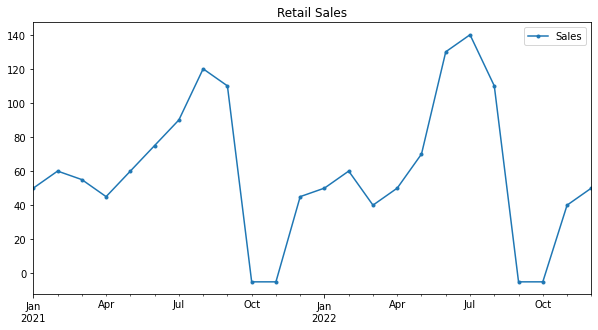

In [164]:
df.plot(figsize=(10,5), title="Retail Sales", marker='.')

In [165]:
# 음수 인덱스
idx = np.where(df<0)
idx

(array([ 9, 10, 20, 21], dtype=int64), array([0, 0, 0, 0], dtype=int64))

In [166]:
idx[0].tolist()

[9, 10, 20, 21]

In [167]:
df['Sales'].iloc[idx[0][0]]

-5

# 음수값 그래프에 표시해보기

Text(0.5, 1.0, 'Retail Sales')

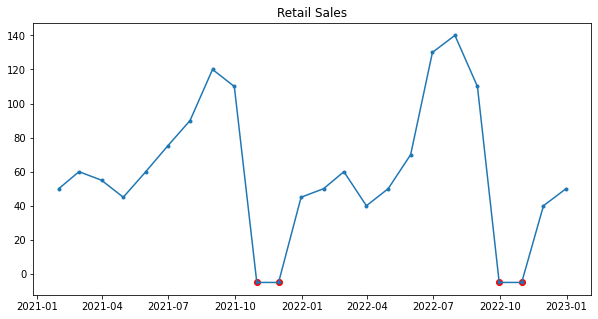

In [168]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['Sales'],marker='.')
ax.scatter(df.iloc[idx[0]].index, df['Sales'].iloc[idx[0]], marker='o', color='r')
ax.set_title("Retail Sales")

# 음수제거

In [169]:
df[df<0] = np.NaN

<AxesSubplot:title={'center':'Retail Sales'}>

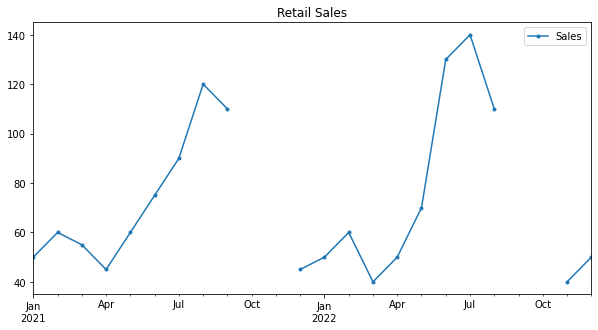

In [170]:
df.plot(figsize=(10,5), title="Retail Sales",marker='.')

# simple imputation

In [171]:
df_filled = df.interpolate(method="linear")

Text(0.5, 1.0, 'Filled Retail Sales')

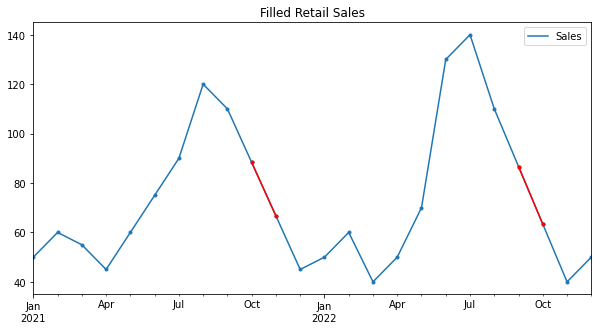

In [176]:
# method 1
# ax 좌표에 df_filled
ax = df_filled.plot(figsize=(10,5), marker='.')
df_filled[df.isnull()].plot(ax=ax,marker='.',color='r', legend=None)
ax.set_title("Filled Retail Sales")

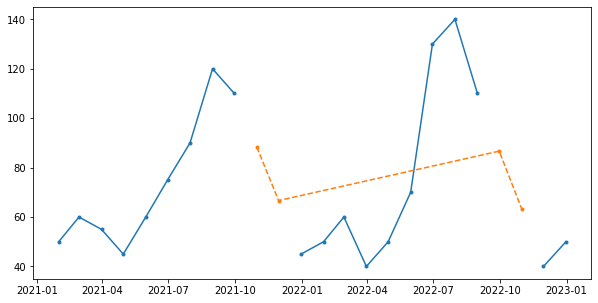

In [174]:
fig ,ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['Sales'],marker='.')
ax.plot(df.iloc[idx[0]].index, df_filled['Sales'].iloc[idx[0]],
        ls="--",marker='.')